# 1. Sample Ratio Mismatch

## Proportion Tests with One Sample

* Null Hypothesis: $p = p_0$
* Alternative Hypothesis: $p \neq p_0$

test statistics:

$z = \frac{(\hat{p}-p_0)}{\sqrt{\frac{p_0(1-p_0)}{n}}}$

[Reference](https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_hypothesistest-means-proportions/bs704_hypothesistest-means-proportions_print.html)

In [1]:
import scipy.stats as st
from math import sqrt 

all_traffic = 1000000
expected_p = 0.5
expected_traffic = all_traffic // 2

print(f"""
Given that we have {all_traffic} data points collected in a {1-expected_p} vs {expected_p} split A/A test\n
We expect to have {expected_traffic} data points (ideally) in the treatment group
""")


Given that we have 1000000 data points collected in a 0.5 vs 0.5 split A/A test

We expect to have 500000 data points (ideally) in the treatment group



In [2]:
aa_traffic = 502000
aa_p = aa_traffic / all_traffic
aa_p = aa_p if aa_p >= 0.5 else 1 - aa_p
z = (aa_p - expected_p) / sqrt(expected_p * (1 - expected_p) / all_traffic)
p_val = (1-st.norm.cdf(z))*2 ## Two-Sided
print(f"""
If we finally got {aa_traffic} data points in the treatment groups
the z-score is {z:.4f}
the (two-sided) p-value is {p_val:.4f}
""")
if p_val < 0.05: print("Sample Ratio Mismatch!")
else: print("Looks fine")


If we finally got 502000 data points in the treatment groups
the z-score is 4.0000
the (two-sided) p-value is 0.0001

Sample Ratio Mismatch!


In [3]:
aa_traffic = 821432
aa_p = aa_traffic / all_traffic
aa_p = aa_p if aa_p >= 0.5 else 1 - aa_p
z = (aa_p - expected_p) / sqrt(expected_p * (1 - expected_p) / all_traffic)
p_val = (1-st.norm.cdf(z))*2 ## Two-Sided
print(f"""
If we finally got {aa_traffic} data points in the treatment groups
the z-score is {z:.4f}
the (two-sided) p-value is {p_val:.4f}
""")
if p_val < 0.05: print("Sample Ratio Mismatch!")
else: print("Looks fine")


If we finally got 821432 data points in the treatment groups
the z-score is 642.8640
the (two-sided) p-value is 0.0000

Sample Ratio Mismatch!


# 2. Inspecting Expected Type-1 Error 

Given significance level = 0.05, the type-1 error rate should be 5% if we repeat the experiments several times.

In [4]:
!pip install --upgrade --quiet plotnine

In [5]:
# Function: Conduct one A/B Test (for proportion testing)
import numpy as np
import pandas as pd
from scipy import stats
from plotnine import *
from plotnine.stats import *
from mizani.formatters import percent_format

def run_ab_test(base_prob=0.4, absolute_effect_size=0.0, sample_size_per_group=40000):
  """ return p_value """
  trials_1 = np.random.binomial(n=sample_size_per_group, p=base_prob)
  trials_2 = np.random.binomial(n=sample_size_per_group, p=base_prob+absolute_effect_size)
  contingency_table = np.array([[trials_1, sample_size_per_group-trials_1], [trials_2, sample_size_per_group-trials_2]])
  p_value = stats.chi2_contingency(contingency_table)[1]
  return p_value

In [6]:
np.random.seed(42)

n_ab_testing = 500
aa_test_results = [run_ab_test() for _ in range(n_ab_testing)]
ab_test_results = [run_ab_test(absolute_effect_size=0.01) for _ in range(n_ab_testing)]

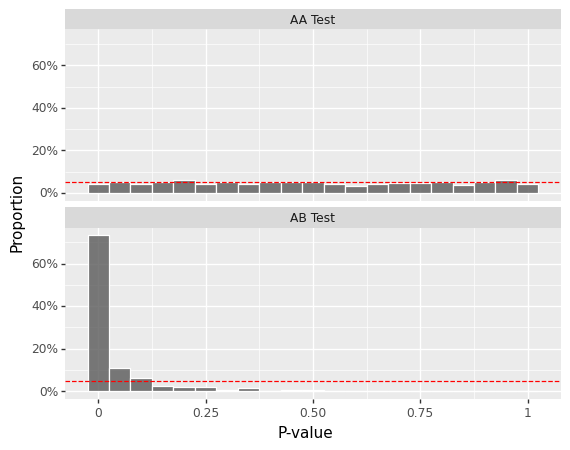

<ggplot: (8726319152245)>

In [7]:
df = pd.DataFrame({"Experiment": ["AA Test" for _ in range(n_ab_testing)] + ["AB Test" for _ in range(n_ab_testing)],
                   "P-value": aa_test_results + ab_test_results})
(
    ggplot(data=df, mapping=aes(x="P-value", y=after_stat('width*density')))
    + geom_histogram(binwidth=0.05, alpha=0.8, colour="white")
    + facet_wrap(facets = "~ Experiment", nrow=2)
    + scale_y_continuous(labels=percent_format())
    + geom_hline(yintercept=0.05, colour="red", linetype="dashed")
    + ylab("Proportion")
)